# What is IForest behavior according to the dataset dimension size?

## Test with 2 dimension dataset

In [2]:
import sys
sys.path.append('../../')
from datasets import datasets as datat
from IForest_DODiMDS import iforest_D as IFD
from metrics import performances
from metrics import visualization
visu = visualization.visualization()

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from scipy.stats import kde


## Generals settings

In [3]:
max_samples = 256
n_trees = 100
threshold = 0.6
min_sample_size = 5
sample_size_step = 5

## Chargement du jeu de données

In [4]:
dts = datat.synthetic_datasets(path_top="../../")
X_brut, y_transform, full_dataset = dts.TwoD_V4_2_0()
X_brut.describe()

,0,1
count,1515.000000,1515.000000
mean,0.043530,-0.200941
std,6.682732,6.705612
min,-9.965654,-9.993573
25%,-6.598318,-6.940761
50%,-0.144715,-0.265882
75%,6.782925,6.363242
max,9.997653,9.967206


In [5]:
dts.description

'Jeu de données à 2 dimensions constitué de données normales et 1% de données anormales. Les données anor-males se retrouvent au centre d’un grand cercle formé par les données normales. Ici, les données anormales sont aléatoires et un peu éloignés des données normales. Données normales : - Données aléatoire uniforme - X1 entre-15 et 15, - X2 entre -12 et 12, - size = 1500, - distance euclidienne entre 9 et 10 (Grand cercle de rayon 10 etpetit cercle de rayon 9) Données anormales : - Données aléatoire uniforme - X1 entre -12 et 12, - X2 entre -9 et9, - size = 15, - distance euclidienne inférieure à 5.'

In [6]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 3 columns):
0    1515 non-null float64
1    1515 non-null float64
2    1515 non-null int64
dtypes: float64(2), int64(1)
memory usage: 35.6 KB


In [7]:
X_brut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 2 columns):
0    1515 non-null float64
1    1515 non-null float64
dtypes: float64(2)
memory usage: 23.8 KB


In [8]:
y_transform.describe()

,0
count,1515.000000
mean,0.980198
std,0.198085
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
y_transform

,0
0,1
1,1
2,1
3,1
4,1
...,...
1510,-1
1511,-1
1512,-1
1513,-1


In [10]:
full_dataset[0:1]

,0,1,2
0,8.247529,4.387897,1


NameError: name 'heatmap' is not defined

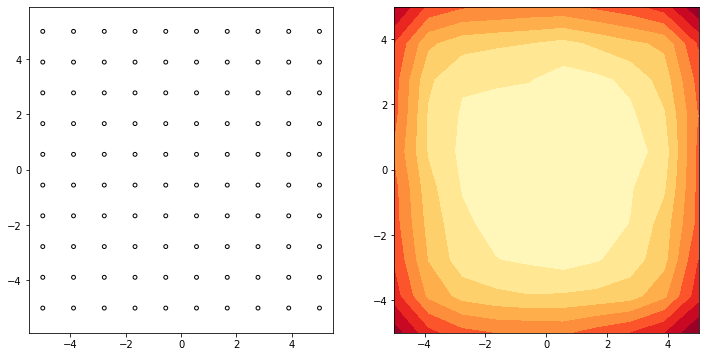

In [11]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
# Créer un jeu de données qui recouvre toute une surface ayant 10 colonnes et 10 lignes contenant 
#des valeurs entre -5. et 5.
xx, yy = np.meshgrid(np.linspace(-5., 5., 10), np.linspace(-5., 5, 10))

plt.scatter(xx,yy,s=15,c='None',edgecolor='k')
plt.axis("equal")

# Calculer le score du jeu de données présumé puis faire le dessin pour voir le résultat possible avec IForest
ax2 = f.add_subplot(122)
F0  = IFD.IsolationForest(sample_size = 256, n_trees=100)
xxx = np.c_[xx.ravel(), yy.ravel()]
F0.fit(pd.DataFrame(xxx))
IFM_y_pred_IF, S0 = F0.predict(X=pd.DataFrame(xxx), threshold=0.5)
S0 = S0.reshape(xx.shape)
levels = np.linspace(np.min(S0),np.max(S0), 10)
CS = ax2.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.colorbar(CS)

(900,)


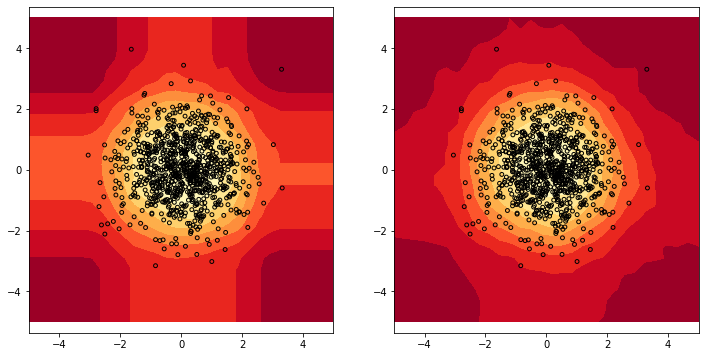

In [25]:

import eif as iso
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
#Nobjs = 500
Nobjs = 900
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
#X = pd.DataFrame(X)

F0  = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=0) # ExtensionLevel=0 is the same as regular Isolation Forest
F1  = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=1)

xx, yy = np.meshgrid(np.linspace(-5., 5., 30), np.linspace(-5., 5, 30))

S0 = F0.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
print(S0.shape)
S0 = S0.reshape(xx.shape)


S1 = F1.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
S1 = S1.reshape(xx.shape)

f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S1),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()

In [26]:
S0 = F0.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
S0 = S0.reshape(xx.shape)

S1 = F1.compute_paths(X_in=np.c_[xx.ravel(), yy.ravel()])
S1 = S1.reshape(xx.shape)